In [1]:
import os

import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
%matplotlib inline

import keras
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [5]:
BASE_PATH = 'C:\\Users\\ttanj\\UoB\\WS18\\DBM\\data'
HEIGHT = 100
WIDTH = 100
NUM_CHANNEL = 3
COLOR_MODE = 'rgb'

In [6]:
input_img = Input(shape=(HEIGHT, WIDTH, NUM_CHANNEL))

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)
# encoded = keras.layers.Lambda(lambda x: x, output_shape=(13, 13, 8), name='lambda_layer')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(NUM_CHANNEL, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 100, 100, 16)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 50, 50, 8)         1160      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 25, 25, 8)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 25, 25, 8)         584       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 8)         0         
__________

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        BASE_PATH,
        target_size=(HEIGHT, WIDTH),
        batch_size=25,
        color_mode=COLOR_MODE,
        class_mode='input',
        shuffle=False,
)

autoencoder.fit_generator(train_generator, epochs=200, steps_per_epoch=10)

Found 250 images belonging to 10 classes.
Epoch 1/200
10/10 [==============================] - 17s 2s/step - loss: 0.6755
Epoch 2/200
10/10 [==============================] - 14s 1s/step - loss: 0.3929
Epoch 3/200
10/10 [==============================] - 14s 1s/step - loss: 0.2387
Epoch 4/200
10/10 [==============================] - 13s 1s/step - loss: 0.2005
Epoch 5/200
10/10 [==============================] - 13s 1s/step - loss: 0.1938
Epoch 6/200
10/10 [==============================] - 14s 1s/step - loss: 0.1865
Epoch 7/200
10/10 [==============================] - 14s 1s/step - loss: 0.1814
Epoch 8/200
10/10 [==============================] - 14s 1s/step - loss: 0.1747
Epoch 9/200
10/10 [==============================] - 14s 1s/step - loss: 0.1671
Epoch 10/200
10/10 [==============================] - 14s 1s/step - loss: 0.1575
Epoch 11/200
10/10 [==============================] - 14s 1s/step - loss: 0.1467
Epoch 12/200
10/10 [==============================] - 13s 1s/step - loss: 0.

In [9]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        BASE_PATH,
        target_size=(HEIGHT, WIDTH),
        shuffle = False,
        color_mode=COLOR_MODE,
        class_mode='input',
        batch_size=1)

decoded_imgs = autoencoder.predict_generator(test_generator, steps=len(test_generator.filenames))

Found 250 images belonging to 10 classes.


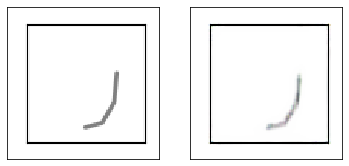

In [11]:
idx = 0

plt.figure()

# display original
ax = plt.subplot(1, 2, 1)
x_train, _ = next(train_generator) 
plt.imshow(x_train[idx].reshape(HEIGHT, WIDTH, NUM_CHANNEL))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# display reconstruction
ax = plt.subplot(1, 2, 2)
plt.imshow(decoded_imgs[idx].reshape(HEIGHT, WIDTH, NUM_CHANNEL))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.show()